## **Import Packages**

In [6]:
# For data processing
import csv
import numpy as np
import pandas as pd
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## **Dataset**
將 LSTM, LSTM-multivariate, LSTM-static, SIRD 中的 TPE, YUN, TNN, TTT 縣市資料做比較

In [7]:
SIRD_dir = os.path.join('..', 'output', 'SIRD')
LSTM_dir = os.path.join('..', 'output', 'LSTM')
LSTM_multivariate_dir = os.path.join('..', 'output', 'LSTM-multivariate')
LSTM_static_dir = os.path.join('..', 'output', 'LSTM-static')

infected_data_path = os.path.join('..', 'data', 'timeline_diagnosed.csv')

## **Setup Parameters**

In [8]:
start_date = "2022-03-17"
pred_long_size = 14

city_codes = ["TPE", "YUN", "TNN", "TTT"]

## **Plot**

In [9]:
def plot_city(city, SIRD_data, LSTM_data, LSTM_multivariate_data,
              LSTM_static_data, real_data):
    plt.plot(SIRD_data)
    plt.plot(LSTM_data)
    plt.plot(LSTM_multivariate_data)
    plt.plot(LSTM_static_data)
    plt.plot(real_data)
    plt.suptitle(f"Time-Series Prediction for {city}")
    plt.xlabel(f"Time (days) from {start_date}")
    plt.ylabel("Number of New Cases")
    plt.legend(("SIRD", "LSTM", "multivariate LSTM", "LSTM static", "real"))
    plt.axvline(x=(len(SIRD_data) - pred_long_size - 1), c='red', linestyle=':')
    plt.show()

In [10]:
infected_dataset = pd.read_csv(infected_data_path)

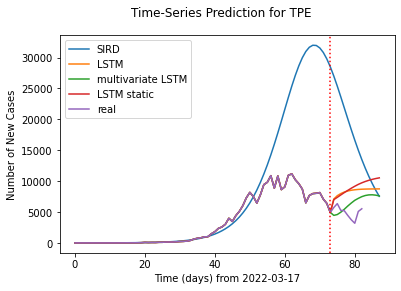

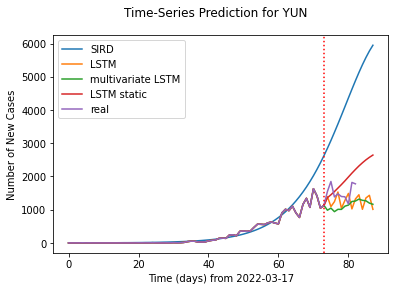

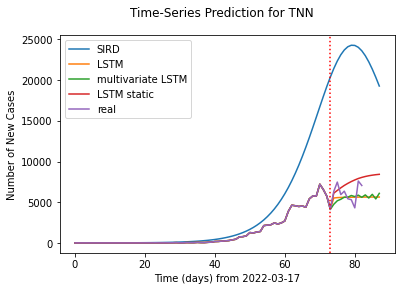

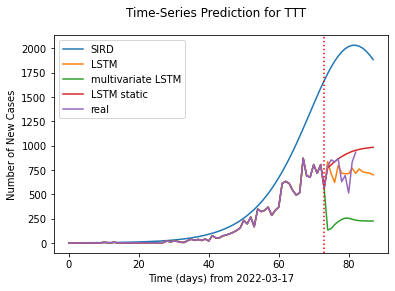

In [11]:
for city in city_codes:
    # SIRD
    with open(os.path.join(SIRD_dir, f"{city}.csv"), 'r') as fp:
        SIRD_data = list(csv.reader(fp))
        SIRD_data = np.array(SIRD_data[8:])[:].astype(int)

    # LSTM
    with open(os.path.join(LSTM_dir, f"{city}.csv"), 'r') as fp:
        LSTM_data = list(csv.reader(fp))
        LSTM_data = np.array(LSTM_data[1:])[:].astype(int)

    # multivariate LSTM
    with open(os.path.join(LSTM_multivariate_dir, f"{city}.csv"), 'r') as fp:
        LSTM_multivariate_data = list(csv.reader(fp))
        LSTM_multivariate_data = np.array(LSTM_multivariate_data[1:])[:].astype(int)
    
    # LSTM with static data
    with open(os.path.join(LSTM_static_dir, f"{city}.csv"), 'r') as fp:
        LSTM_static_data = list(csv.reader(fp))
        LSTM_static_data = np.array(LSTM_static_data[1:])[:].astype(int)

    # real timeline
    mask = ((infected_dataset["city"] == city)
            & (infected_dataset["date"] >= start_date))
    real_data = infected_dataset[mask]["count"].values.reshape(-1, 1)

    plot_city(city, SIRD_data, LSTM_data, LSTM_multivariate_data,
              LSTM_static_data, real_data)